In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers, datasets, Sequential

print('python version:', sys.version.split('\n')[0])
for m in [tf, np, pd, mpl, sns]:
    print(m.__name__, 'version:', m.__version__)

python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
tensorflow version: 2.3.1
numpy version: 1.18.5
pandas version: 1.1.3
matplotlib version: 3.3.2
seaborn version: 0.11.0


# Himmelblau function optimization

In [2]:
# f(𝑦,𝑧) = (x**2 + y − 11)**2 + (x + y**2 − 7)**2
def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

In [3]:
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(x, y)
Z = himmelblau([X, Y])

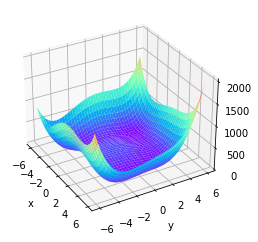

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap = plt.cm.rainbow) 
ax.view_init(30, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [21]:
x = tf.constant([0., 4.])

for step in range(100):
    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)
    grads = tape.gradient(y, [x])[0]
    x -= 0.01*grads
    if step%20 == 19:
        print('step {}: x = {}, f(x) = {}'.format(step, x.numpy(), y.numpy()))

step 19: x = [-2.8050668  3.1313083], f(x) = 6.948932878003689e-07
step 39: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 59: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 79: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
step 99: x = [-2.805118   3.1313124], f(x) = 2.2737367544323206e-13
